In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime as date

In [2]:
start = '2001-01-01'
last = date.datetime.today() - date.timedelta(days=1)
year = last.strftime("%Y")
month = last.strftime("%m")
day = last.strftime("%d")
end = year + "-" + month + "-" + day

df = data.DataReader('EICHERMOT.NS', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-01-01,2.800,2.735,2.740,2.80,19290.0,1.756827
2001-01-02,2.950,2.755,2.755,2.87,84930.0,1.800748
2001-01-03,3.000,2.840,2.840,2.94,78200.0,1.844669
2001-01-04,2.995,2.900,2.950,2.90,51000.0,1.819571
2001-01-05,2.950,2.810,2.895,2.95,74930.0,1.850943


In [3]:
df = df.reset_index()
df = df.drop(['Date', 'Adj Close'], axis = 1)

df.head()

,High,Low,Open,Close,Volume
0,2.800,2.735,2.740,2.80,19290.0
1,2.950,2.755,2.755,2.87,84930.0
2,3.000,2.840,2.840,2.94,78200.0
3,2.995,2.900,2.950,2.90,51000.0
4,2.950,2.810,2.895,2.95,74930.0


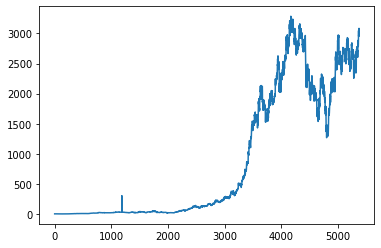

In [4]:
plt.plot(df.Close)

In [5]:
ma_hundred = df.Close.rolling(100).mean()
ma_twoh = df.Close.rolling(200).mean()

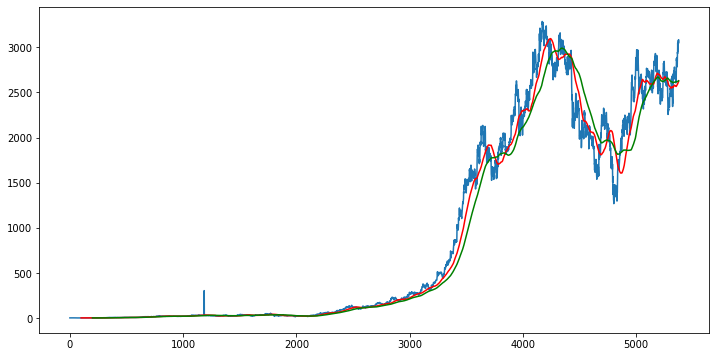

In [6]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma_hundred, 'r')
plt.plot(ma_twoh, 'g')

In [7]:
train_set = pd.DataFrame(df['Close'][0:int(len(df) * 0.80)])
test_set = pd.DataFrame(df['Close'][int(len(df) * 0.80): int (len(df))])

print(train_set.shape)
print(test_set.shape)

(4300, 1)
(1075, 1)


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [9]:
train_list = scaler.fit_transform(train_set)
train_list

array([[3.13601300e-04],
       [3.34913990e-04],
       [3.56226753e-04],
       ...,
       [8.77829452e-01],
       [8.77747240e-01],
       [8.73146707e-01]])

In [10]:
x_train = []
y_train = []

for i in range(100, train_list.shape[0]):
    x_train.append(train_list[i-100: i])
    y_train.append(train_list[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [12]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.3))

model.add(LSTM(units = 100, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.4))

model.add(LSTM(units = 150, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 80)           41920     
                                                                 
 dropout_1 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 100)          72400     
                                                                 
 dropout_2 (Dropout)         (None, 100, 100)          0         
                                                                 
 lstm_3 (LSTM)               (None, 150)               1

In [14]:
print(x_train.shape)
print(y_train.shape)

(4200, 100, 1)
(4200,)


In [15]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
132/132 [==============================] - 30s 198ms/step - loss: 0.0133
Epoch 2/50
132/132 [==============================] - 28s 215ms/step - loss: 0.0032
Epoch 3/50
132/132 [==============================] - 30s 226ms/step - loss: 0.0028
Epoch 4/50
132/132 [==============================] - 30s 229ms/step - loss: 0.0025
Epoch 5/50
132/132 [==============================] - 31s 235ms/step - loss: 0.0028
Epoch 6/50
132/132 [==============================] - 30s 227ms/step - loss: 0.0023
Epoch 7/50
132/132 [==============================] - 30s 229ms/step - loss: 0.0023
Epoch 8/50
132/132 [==============================] - 31s 233ms/step - loss: 0.0023
Epoch 9/50
132/132 [==============================] - 31s 232ms/step - loss: 0.0021
Epoch 10/50
132/132 [==============================] - 31s 234ms/step - loss: 0.0024
Epoch 11/50
132/132 [==============================] - 31s 236ms/step - loss: 0.0021
Epoch 12/50
132/132 [==============================] - 31s 234ms/step - lo

In [16]:
model.save('stocks_model.h5')

In [17]:
temp = train_set.tail(100)

test_final = temp.append(test_set, ignore_index = True)

test_final.head()

C:\Users\anrag\AppData\Local\Temp\ipykernel_14340\2699504873.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_final = temp.append(test_set, ignore_index = True)


,Close
0,3117.080078
1,3148.330078
2,3171.639893
3,3161.754883
4,3181.175049


In [18]:
input2 = scaler.fit_transform(test_final)
input2.shape

(1175, 1)

In [19]:
x_test = []
y_test = []

for i in range(100, input2.shape[0]):
    x_test.append(input2[i-100: i])
    y_test.append(input2[i, 0])

In [20]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1075, 100, 1)
(1075,)


In [21]:
from tensorflow import keras

In [22]:
predictor = keras.models.load_model('stocks_model.h5')

y_predict = predictor.predict(x_test)

y_predict.shape

34/34 [==============================] - 7s 160ms/step


(1075, 1)

In [23]:
scale_factor = 1/(scaler.scale_[0])
scale_factor

1969.0999755859375

In [24]:
y_predict *= scale_factor
y_test *= scale_factor

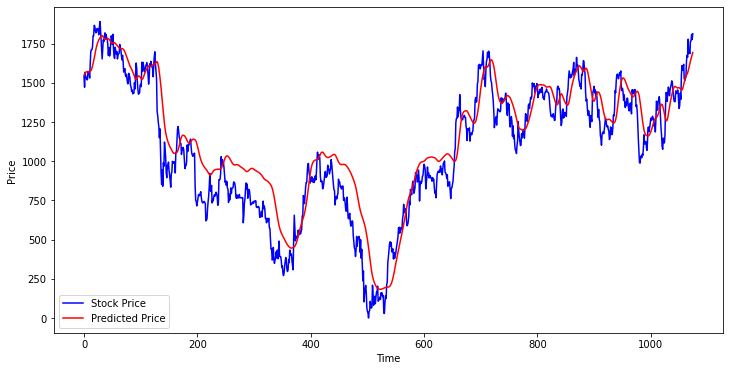

In [25]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Stock Price')
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [26]:
count = 0

for i in range (0, len(y_test)):
    if(abs(y_test[i] - y_predict[i]) <= 250):
        count += 1
        
print(count/len(y_test))

0.8874418604651163


In [27]:
print(df['Close'].iloc[-1])

3081.199951171875
